# Classification Part 2



In [10]:
#load the data

#In this example I am using one of the built in datasets
#Some classification problems will give you pre defined train and test splits
#in this case, as we don't have a train test split i make one using the functionality in sklearn

import pandas as pd

iris = pd.read_csv("../../Datasets/Iris.csv")

X = iris[["sepal_length", "petal_length", "petal_width"]]
y = iris["species"]
print(X)
print(y)


     sepal_length  petal_length  petal_width
0             5.1           1.4          0.2
1             4.9           1.4          0.2
2             4.7           1.3          0.2
3             4.6           1.5          0.2
4             5.0           1.4          0.2
..            ...           ...          ...
145           6.7           5.2          2.3
146           6.3           5.0          1.9
147           6.5           5.2          2.0
148           6.2           5.4          2.3
149           5.9           5.1          1.8

[150 rows x 3 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object


create train and test set



In [11]:
#Divide the data into train and test splits

from sklearn.model_selection import train_test_split
#using train test split, i take the data and labels, and split them into a
#80/20 train test set. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Evaluating Classifiers

#Evaluating Binary Classifiers

ROC
Log Loss
Precision and Recall
f1 score

In [12]:

#Here I have made some dummy predcitions, and the associated ground truth
y_pred = [0,0,0,0,2,0,0]
y_true = [0,0,0,1,2,1,0]

#we should have an accuracy of 57%. 5 of our predictions match our ground truth, and 2 do not.
# IE 5/7 ~ 71%
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print(accuracy)

0.7142857142857143


In [13]:

from sklearn.metrics import balanced_accuracy_score

#with balanced accuracy we get a much lower score
accuracy = balanced_accuracy_score(y_true, y_pred)
print(accuracy)



0.6666666666666666


`balanced_accuracy_score` function computes the Balanced accuracy, which avoids the inflated estimate produced by our accuracy score.
If we consider that the test data we used before is imbalanced. Such that our histogram of class labels is : `[4,2,1]`
Then predicting class 0 often will result in a high accuracy score, because the classifier might be exploiting the distribution of our  data, therefore we're not assessing the predictive power of the classifier.



Precision is the ability of the classifier not to label as positive a sample that is negative, and recall is the ability of the classifier to find all the positive samples.


0.6666666666666666
0.3333333333333333
0.6666666666666666
0.3333333333333333
[0.5        0.66666667 1.        ]
[1.         0.33333333 0.        ]


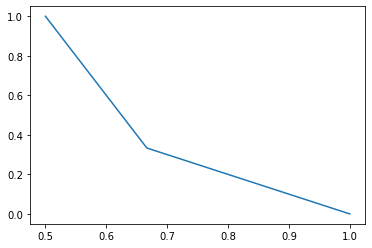

In [14]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

y_pred = [0,0,0,0,1,1,0,0,0,1,0,0]
y_true = [0,1,0,1,1,1,1,0,0,0,0,1]

#given a two class problem we can obtain the true positive, true negative, false positive, and false negative scores.
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

#we can either calculate the precision and recall scores manually

precision_man = tp / (tp + fp)
recall_man = tp / (tp + fn)

print(precision_man)
print(recall_man)

#or we can use the functions
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(precision)
print(recall)

#we can plot the precision recall curve
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_true, y_pred)

print(precision)
print(recall)

import matplotlib.pyplot as plt
plt.plot(precision, recall)
plt.show()


## Multi Class Precision and Recall

when calculating the precision and recall for multiple classes we have a couple of strategies.

`'micro'`:

    Calculate metrics globally by counting the total true positives, false negatives and false positives.
`'macro'`:

    Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
    
`'weighted'`:

    Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). 
    This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.




 




In [15]:
from sklearn.metrics import precision_score, recall_score

y_pred = [0,0,0,0,2,0,0]
y_true = [0,0,0,1,2,1,0]

macro_precision = precision_score(y_true, y_pred, average='macro')
print(macro_precision)

micro_precision = precision_score(y_true, y_pred, average='micro')
print(micro_precision)

weighted_precision = precision_score(y_true, y_pred, average='weighted')
print(weighted_precision)

macro_recall = recall_score(y_true, y_pred, average='macro')
print(macro_recall)

micro_recall = recall_score(y_true, y_pred, average='micro')
print(micro_recall)

weighted_recall = recall_score(y_true, y_pred, average='weighted')
print(weighted_recall)


0.5555555555555555
0.7142857142857143
0.5238095238095238
0.6666666666666666
0.7142857142857143
0.7142857142857143


## Receiver operating characteristic (ROC)



[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

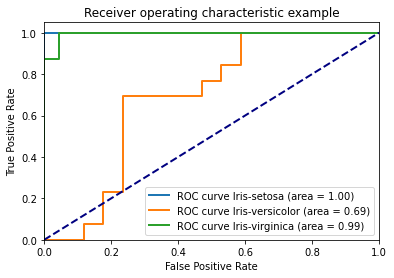

In [25]:


from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels


classes = unique_labels(y)
# Binarize the output
y_bin = label_binarize(y, classes=classes)
n_classes = y_bin.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2

#plot each roc curve in the onevsrest classifier.
#class setosa vs rest, class versicolor vs rest and class virginica vs rest
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
            lw=lw, label='ROC curve %s (area = %0.2f)' % (classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


## Grid Search Cross Validation

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#setup your nearest classifier. 
from sklearn.neighbors import KNeighborsClassifier

#Here i create a 2NN classifier
kNN = KNeighborsClassifier(n_neighbors=2)

from sklearn.model_selection import GridSearchCV

#make a dictionary, where the parameter we want to set, and the range of values we want to cross-validate over
#in this example I am going to set the k parameter in kNN, where I am testing between 1 to 5.
parameters = {
    "n_neighbors" : [1,2,3,4,5]
}

clf = GridSearchCV(kNN,param_grid=parameters)
clf.fit(X_train, y_train)

#here we can see the best parameter was for n_neighbors
print(clf.best_params_)

#collect predictions on test data
y_hat = clf.predict(X_test)


#calculate the score - accuracy / error or other metrics.
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_hat)
print(accuracy)

{'n_neighbors': 1}
0.9


## Pre-processing data and building a pipeline
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline


In [27]:

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA

estimators = [("PCA", PCA()), ("clf", SVC())]

pipe = Pipeline(estimators)
print(pipe)
print(y_train)

#we can use a pipeline like a classifier or transformer.
pipe.fit(X_train, y_train)

y_preds = pipe.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_preds)
print(accuracy)


Pipeline(steps=[('PCA', PCA()), ('clf', SVC())])
128     Iris-virginica
148     Iris-virginica
83     Iris-versicolor
109     Iris-virginica
103     Iris-virginica
            ...       
81     Iris-versicolor
66     Iris-versicolor
141     Iris-virginica
146     Iris-virginica
77     Iris-versicolor
Name: species, Length: 120, dtype: object
1.0


## Grid Searching on a pipeline



In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

estimators = Pipeline([("PCA", PCA()), ("clf", SVC())])


#we build the parameter grid the same way as we did before.
#This time we can specify parameters to set for our CV by using the element in the pipline, and their components.
param_grid = {"PCA": ["passthrough", PCA(5), PCA(10)], "clf__C": [0.1, 10, 100]}


from sklearn.model_selection import GridSearchCV
#use our pipeline and the parameter grid with GridSearchCV
clf = GridSearchCV(estimators, param_grid=param_grid)
clf.fit(X_train, y_train);

#here we can see the best parameter was for n_neighbors
print(clf.best_params_)

#collect predictions on test data
y_hat = clf.predict(X_test)


#calculate the score - accuracy / error or other metrics.
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_hat)
print(accuracy)

{'PCA': 'passthrough', 'clf__C': 10}
1.0
